In [1]:
import pandas as pd
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource, DatetimeTickFormatter
from bokeh.models.tools import HoverTool
from bokeh.io import output_notebook
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [2]:
output_notebook()
df = pd.read_csv('../data/central_park_weather_data.csv', dtype='object')

Loading BokehJS ...

Convert date and temperature formats. Generate columns for day, week, and month.

In [3]:
df['DATE'] = pd.to_datetime(df['DATE'])
df['weekday'] = df.DATE.dt.weekday
df['week'] = df.DATE.dt.week
df['month'] = df.DATE.dt.month
df['year'] = df.DATE.dt.year
df = df[df.DATE >= '20010101']
df['TMAX'] = df['TMAX'].astype('int')
df['TMIN'] = df['TMIN'].astype('int')
df['PRCP'] = df['PRCP'].astype('float')
df['weekday'] = df.DATE.dt.weekday
df['month'] = df.DATE.dt.month
df['week'] = df.DATE.dt.week
df.head()


,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,ACMH,ACMH_ATTRIBUTES,ACSH,ACSH_ATTRIBUTES,...,WT19,WT19_ATTRIBUTES,WT21,WT21_ATTRIBUTES,WT22,WT22_ATTRIBUTES,weekday,week,month,year
48212,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2001-01-01,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1,2001
48213,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2001-01-02,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,2001
48214,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2001-01-03,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2,1,1,2001
48215,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2001-01-04,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3,1,1,2001
48216,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2001-01-05,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,",,X",4,1,1,2001


List columns that do not have any missing data.

In [4]:
df.columns[~df.isnull().any()].tolist()

['STATION',
 'NAME',
 'LATITUDE',
 'LONGITUDE',
 'ELEVATION',
 'DATE',
 'PRCP',
 'PRCP_ATTRIBUTES',
 'TMAX',
 'TMAX_ATTRIBUTES',
 'TMIN',
 'TMIN_ATTRIBUTES',
 'weekday',
 'week',
 'month',
 'year']

In [5]:
df = df[df.columns[~df.isnull().any()]]
df.head()

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,weekday,week,month,year
48212,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2001-01-01,0.00,",,0,2400",32,",,0",23,",,0",0,1,1,2001
48213,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2001-01-02,0.00,",,0,2400",27,",,0",19,",,0",1,1,1,2001
48214,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2001-01-03,0.00,",,0,2400",31,",,0",18,",,0",2,1,1,2001
48215,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2001-01-04,0.00,",,0,2400",34,",,0",25,",,0",3,1,1,2001
48216,USW00094728,"NY CITY CENTRAL PARK, NY US",40.77898,-73.96925,42.7,2001-01-05,0.19,",,0,2400",33,",,0",24,",,0",4,1,1,2001


For the first iteration of the model we will be using temperature and precipitation so there is no extra work to be done.

             PRCP      TMAX      TMIN   weekday      week     month      year
PRCP     1.000000 -0.004160  0.042742  0.001151  0.020745  0.021824 -0.002243
TMAX    -0.004160  1.000000  0.957780 -0.009762  0.262122  0.261765 -0.004580
TMIN     0.042742  0.957780  1.000000 -0.008092  0.320678  0.320530  0.001719
weekday  0.001151 -0.009762 -0.008092  1.000000  0.000174  0.000501  0.000594
week     0.020745  0.262122  0.320678  0.000174  1.000000  0.971628 -0.029214
month    0.021824  0.261765  0.320530  0.000501  0.971628  1.000000 -0.029767
year    -0.002243 -0.004580  0.001719  0.000594 -0.029214 -0.029767  1.000000


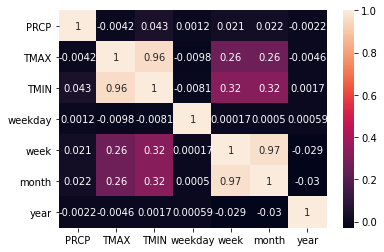

In [6]:
corr = df.corr()
print(corr)
sns.heatmap(corr, annot=True) 

Visualize the data to get a sense of how it looks.

In [7]:
source = ColumnDataSource(df)
p_max = figure(plot_width=1200, plot_height=600, x_axis_label='Year', y_axis_label='Maximum Temperature (F)')
p_max.xaxis.formatter=DatetimeTickFormatter()
p_max.circle(x='DATE', y='TMAX', source=source, size=10, fill_alpha=.5)
show(p_max)

In [8]:
p_min = figure(plot_width=1200, plot_height=600, x_axis_label='Year', y_axis_label='Minimum Temperature (F)')
p_min.xaxis.formatter=DatetimeTickFormatter()
p_min.circle(x='DATE', y='TMIN', source=source, size=10, fill_alpha=.5)
show(p_min)

In [9]:
p_precip = figure(plot_width=1200, plot_height=600, x_axis_label='Year', y_axis_label='Precipitation')
p_precip.xaxis.formatter=DatetimeTickFormatter()
p_precip.circle(x='DATE', y='PRCP', source=source, size=10, fill_alpha=.5)
show(p_precip)